In [24]:
#libraries learnt so far:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
#GETTING THE DATA
data = pd.read_csv('fifa21_training.csv')
data.head()

#We see that from column "LS" to "GK" are overall scores to other positions
#As a result, we believe we will assume the player will play the position it is said to be playing

#Numerical variables important:
  #Age
  #Heights: don't understand the measure (it's not cm?)
  #Weight: don't understand the measure (it's not kg)
  #Grow? We'll have to change
  #Value: maybe? It should be the other way around?
  #Wage: maybe? It should be the other way around?
  #Attacking
  #Crossing
  #W/F: Week Foot: 4/5
  #SM: Skills
  #A/N: CHECK!

#Dont take into account: foot, joined, loan date, Release Clause, Contract

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [26]:
#Spliting numerical and categorical data:

numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)
numerical.head()
categorical.head()

#Which ones should not be categorical:  height, weight, value, wage, W/F, SM, IR, Hits 

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,1954,184383,26,1,258,54,47,43,70,44.0,...,6,1682,357,69,51,63,63,51,60,64
1,2225,188044,30,0,365,66,79,76,68,76.0,...,16,1961,412,83,75,68,82,33,71,77
2,1959,184431,33,0,336,73,76,34,78,75.0,...,3,1925,404,80,77,78,86,27,56,80
3,9815,233796,22,13,242,44,42,58,62,36.0,...,12,1527,329,57,44,54,57,57,60,59
4,10074,234799,23,8,249,49,37,61,68,34.0,...,15,1664,360,66,44,60,64,60,66,65


,Name,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Joined,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015",...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2


In [27]:
#I will now clean the categories with rare values and will convert it into numbers:
data = pd.read_csv('fifa21_training.csv')

numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)

categorical['Weight'] = categorical['Weight'].replace('lbs','',regex=True)
categorical['Height'] = categorical['Height'].replace('"','',regex=True)
categorical['Height'] = categorical['Height'].replace("'",".",regex=True)
categorical['W/F'] = categorical['W/F'].replace('★','',regex=True)
categorical['SM'] = categorical['SM'].replace('★','',regex=True)
categorical['IR'] = categorical['IR'].replace('★','',regex=True)
categorical['Weight'] = pd.to_numeric(categorical['Weight'],errors='coerce')
categorical['Height'] = pd.to_numeric(categorical['Height'],errors='coerce')
categorical['W/F'] = pd.to_numeric(categorical['W/F'],errors='coerce')
categorical['SM'] = pd.to_numeric(categorical['SM'],errors='coerce')
categorical['IR'] = pd.to_numeric(categorical['IR'],errors='coerce')
categorical['Value'] = categorical['Value'].replace("€","",regex=True)
def clean(x):
    if 'M' in x:
        return 1000000
    elif 'K' in x:
        return 1000
    else:
        return 1
categorical['Value2'] = list(map(clean, categorical['Value']))
categorical['Value'] = categorical['Value'].replace("M","",regex=True)
categorical['Value'] = categorical['Value'].replace("K","",regex=True)
categorical['Value'] = pd.to_numeric(categorical['Value'],errors='coerce')
categorical['Value'] = categorical['Value'] * categorical['Value2']

categorical['Wage'] = categorical['Wage'].replace("€","",regex=True)
def clean(x):
    if 'M' in x:
        return 1000000
    elif 'K' in x:
        return 1000
    else:
        return 1
categorical['Wage2'] = list(map(clean, categorical['Wage']))
categorical['Wage'] = categorical['Wage'].replace("M","",regex=True)
categorical['Wage'] = categorical['Wage'].replace("K","",regex=True)
categorical['Wage'] = pd.to_numeric(categorical['Wage'],errors='coerce')
categorical['Wage'] = categorical['Wage'] * categorical['Wage2']

categorical['Hits'] = pd.to_numeric(categorical['Hits'],errors='coerce')

categorical.head()

<ipython-input-27-b9aa24433d35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Weight'] = categorical['Weight'].replace('lbs','',regex=True)
<ipython-input-27-b9aa24433d35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Height'] = categorical['Height'].replace('"','',regex=True)
<ipython-input-27-b9aa24433d35>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Name,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Joined,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Value2,Wage2
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161,Right,"Jul 1, 2015",...,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,1000,1000
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,"Jan 16, 2015",...,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,1000000,1000
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134,Right,"Jan 31, 2019",...,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,1000000,1000
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152,Right,"Jul 1, 2016",...,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,1000,1000
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150,Right,"Jul 1, 2018",...,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,1000,1000


In [28]:
numerical_append = categorical.select_dtypes(include = np.number)
numerical_append.head()

,Height,Weight,Value,Wage,W/F,SM,IR,Hits,Value2,Wage2
0,5.90,161,525000.0,4000,4,2,1,3.0,1000,1000
1,6.00,159,8500000.0,23000,3,4,2,44.0,1000000,1000
2,5.40,134,9000000.0,49000,4,4,2,73.0,1000000,1000
3,5.10,152,275000.0,4000,2,2,1,7.0,1000,1000
4,5.11,150,725000.0,2000,2,3,1,4.0,1000,1000


In [29]:

data2 = pd.concat([numerical,numerical_append], axis =1)
data2.head()

data2.columns
data2.shape


,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,Height,Weight,Value,Wage,W/F,SM,IR,Hits,Value2,Wage2
0,1954,184383,26,1,258,54,47,43,70,44.0,...,5.90,161,525000.0,4000,4,2,1,3.0,1000,1000
1,2225,188044,30,0,365,66,79,76,68,76.0,...,6.00,159,8500000.0,23000,3,4,2,44.0,1000000,1000
2,1959,184431,33,0,336,73,76,34,78,75.0,...,5.40,134,9000000.0,49000,4,4,2,73.0,1000000,1000
3,9815,233796,22,13,242,44,42,58,62,36.0,...,5.10,152,275000.0,4000,2,2,1,7.0,1000,1000
4,10074,234799,23,8,249,49,37,61,68,34.0,...,5.11,150,725000.0,2000,2,3,1,4.0,1000,1000


Index(['Unnamed: 0', 'ID', 'Age', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'OVA', 'Height', 'Weight', 'Value', 'Wage', 'W/F', 'SM', 'IR', 'Hits',
       'Value2', 'Wage2'],
      dtype='object')

(13700, 64)

In [34]:
#Dealing with null values

nulls_df = pd.DataFrame(round(data2.isna().sum()/len(data2),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']

#nulls_df[nulls_df['percent_nulls']>0]

#We see that null values are low so we will hcange it to the mean to get a more normally distributed:

data2['Volleys'] = data2['Volleys'].fillna(np.mean(data2['Volleys']))
data2['Curve'] = data2['Curve'].fillna(np.mean(data2['Curve']))
data2['Agility'] = data2['Agility'].fillna(np.mean(data2['Agility']))
data2['Balance'] = data2['Balance'].fillna(np.mean(data2['Balance']))
data2['Jumping'] = data2['Jumping'].fillna(np.mean(data2['Jumping']))
data2['Interceptions'] = data2['Interceptions'].fillna(np.mean(data2['Interceptions']))
data2['Positioning'] = data2['Positioning'].fillna(np.mean(data2['Positioning']))
data2['Vision'] = data2['Vision'].fillna(np.mean(data2['Vision']))
data2['Composure'] = data2['Composure'].fillna(np.mean(data2['Composure']))
data2['Sliding Tackle'] = data2['Sliding Tackle'].fillna(np.mean(data2['Sliding Tackle']))
data2['Hits'] = data2['Hits'].fillna(np.mean(data2['Hits']))


data2.head()

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,Weight,Value,Wage,W/F,SM,IR,Hits,Value2,Wage2,Value_log
0,1954,184383,26,1,258,54,47,43,70,44.0,...,161,525000.0,4000,4,2,1,3.0,1000,1000,5.720159
1,2225,188044,30,0,365,66,79,76,68,76.0,...,159,8500000.0,23000,3,4,2,44.0,1000000,1000,6.929419
2,1959,184431,33,0,336,73,76,34,78,75.0,...,134,9000000.0,49000,4,4,2,73.0,1000000,1000,6.954243
3,9815,233796,22,13,242,44,42,58,62,36.0,...,152,275000.0,4000,2,2,1,7.0,1000,1000,5.439333
4,10074,234799,23,8,249,49,37,61,68,34.0,...,150,725000.0,2000,2,3,1,4.0,1000,1000,5.860338


<ipython-input-98-c05dba6f6311>:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


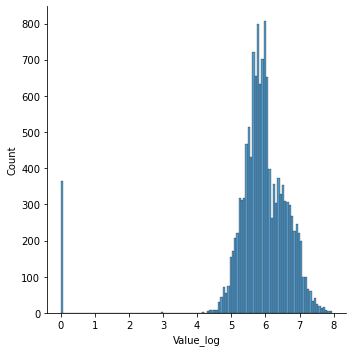

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,Weight,Value,Wage,W/F,SM,IR,Hits,Value2,Wage2,Value_log
0,1954,184383,26,1,258,54,47,43,70,44.0,...,161,525000.0,4000,4,2,1,3.0,1000,1000,5.720159
1,2225,188044,30,0,365,66,79,76,68,76.0,...,159,8500000.0,23000,3,4,2,44.0,1000000,1000,6.929419
2,1959,184431,33,0,336,73,76,34,78,75.0,...,134,9000000.0,49000,4,4,2,73.0,1000000,1000,6.954243
3,9815,233796,22,13,242,44,42,58,62,36.0,...,152,275000.0,4000,2,2,1,7.0,1000,1000,5.439333
4,10074,234799,23,8,249,49,37,61,68,34.0,...,150,725000.0,2000,2,3,1,4.0,1000,1000,5.860338


In [98]:
#Now we we'll do some log transformation
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
    
data2['Value_log'] = list(map(log_transfom_clean1, data2['Value']))
sns.displot(data2['Value_log'])
plt.show()
data2.head()
#outliers:

#iqr = np.percentile(data2['Value'],75) - np.percentile(data2['Value'],25)

#upper_limit = np.percentile(data2['Value'],75) + 1.5*iqr
#lower_limit = np.percentile(data2['Value'],25) - 1.5*iqr

#now I would delete the outliers from the data

#data2 = (data2['Value']>lower_limit) & (data2['Value']<upper_limit)
#data2.head()


In [99]:
#Let's now discuss categorical variables:
categorical2 = categorical.select_dtypes(include = np.object)

#We decide to drop everything but A/W and D/W

categorical2 = categorical2.drop(['Name','Nationality','Club', 'Position','BP', 'Team & Contract','foot','Joined','Loan Date End','Release Clause','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK','Contract','LS','ST','RS','LW','LF','CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB'],axis=1)

#We see the Medium is the mode so we replace null values with medium
categorical2['A/W'] = categorical2['A/W'].fillna('Medium')
categorical2['D/W'] = categorical2['D/W'].fillna('Medium')


#from sklearn.preprocessing import LabelEncoder
#AW_encoded = LabelEncoder().fit(categorical2['A/W'].astype(str)).transform(categorical2['A/W'].astype(str)) 
#AW_encoded = pd.DataFrame(AW_encoded, columns = ['A/W'])
#AW_encoded.value_counts() # ordered value counts

#from sklearn.preprocessing import LabelEncoder
#DW_encoded = LabelEncoder().fit(categorical2['D/W'].astype(str)).transform(categorical2['D/W'].astype(str)) 
#DW_encoded = pd.DataFrame(AW_encoded, columns = ['D/W'])
#DW_encoded.value_counts() # ordered value counts

#We will now Hot Encoding:

cat_hot_encoded = pd.get_dummies(categorical2)
cat_hot_encoded2 = cat_hot_encoded.drop(['A/W_Low','D/W_Low'],axis=1)

In [100]:
#REGRESSION MODEL FOR THE NUMERICAL VARIABLES:
#X = 'Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping'
#we drop the columns Unnamed: o, ID, Value2, Wage2 and Value because they dont give us info
#we also drop the summations of features: 'Value','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping'
#cause otherwise we would be waging them too much 
data3 = data2.drop(['Unnamed: 0','ID','Value2','Wage2','Value','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping'],axis=1)
data3.head()
data3.columns

,Age,Growth,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,...,PHY,OVA,Height,Weight,Wage,W/F,SM,IR,Hits,Value_log
0,26,1,54,47,43,70,44.0,61,44.0,55,...,60,64,5.90,161,4000,4,2,1,3.0,5.720159
1,30,0,66,79,76,68,76.0,83,78.0,72,...,71,77,6.00,159,23000,3,4,2,44.0,6.929419
2,33,0,73,76,34,78,75.0,85,89.0,91,...,56,80,5.40,134,49000,4,4,2,73.0,6.954243
3,22,13,44,42,58,62,36.0,54,41.0,46,...,60,59,5.10,152,4000,2,2,1,7.0,5.439333
4,23,8,49,37,61,68,34.0,64,44.0,45,...,66,65,5.11,150,2000,2,3,1,4.0,5.860338


Index(['Age', 'Growth', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA', 'Height', 'Weight', 'Wage',
       'W/F', 'SM', 'IR', 'Hits', 'Value_log'],
      dtype='object')

In [101]:
data_final = pd.concat([data3, cat_hot_encoded2], axis=1)

In [102]:
#MODEL WITH THE FOLLOWING VARIABLES:

#numerical:
#'Age', 'Growth', 'Crossing', 'Finishing', 'Heading Accuracy',
#'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 
#'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 
#'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 
#'Stamina','Strength', 'Long Shots', 'Aggression', 'Interceptions', 
#'Positioning','Vision', 'Penalties', 'Composure', 'Marking', 
#'Standing Tackle','Sliding Tackle', 'GK Diving', 'GK Handling', 
#'GK Kicking','GK Positioning', 'GK Reflexes', 'Total Stats', 
#'Base Stats', 'PAC','SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA', 
#'Height', 'Weight', 'Wage','W/F', 'SM', 'IR', 'Value_log',Hits

#categorical: AW, DW

#Splitting into train set and test set.
from sklearn.model_selection import train_test_split

y = data2['OVA']
X = data_final.drop('OVA', axis=1)

X_num = data3.drop('OVA', axis=1)
X_cat = cat_hot_encoded2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#X_train.head()

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import mean_absolute_error


predictions = lm.predict(X_test)


#R2.
r2 = r2_score(y_test, predictions)
#MSE.
mse = mean_squared_error(y_test, predictions)
#RMSE.
rmse = math.sqrt(mse)
#MAE.
mae = mean_absolute_error(y_test, predictions)

print('r2:',r2)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

array([70.40916578, 73.20167842, 81.89387757, ..., 62.14787168,
       60.90933394, 59.51725869])

r2: 0.9082857578276861
mse: 4.246708766024418
rmse: 2.060754416718406
mae: 1.6051279987544966


In [104]:
import pickle
pickle.dump(lm, open('Fifa_Model_ATNM', 'wb'))

#X_test = pd.DataFrame(X_test, columns = boston['feature_names'])
#y_test = pd.Series(y_test, name = 'labels')
#display(X_test.head())
#display(y_test.head())

#X_test.to_pickle('xtest.p')
#y_test.to_pickle('ytest.p')

In [37]:
#MODEL WITH ONLY THE FOLLOWING VARIABLES:

#'Age', 'Growth', 'Crossing', 'Finishing', 'Heading Accuracy',
#'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 
#'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 
#'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 
#'Stamina','Strength', 'Long Shots', 'Aggression', 'Interceptions', 
#'Positioning','Vision', 'Penalties', 'Composure', 'Marking', 
#'Standing Tackle','Sliding Tackle', 'GK Diving', 'GK Handling', 
#'GK Kicking','GK Positioning', 'GK Reflexes', 'Total Stats', 
#'Base Stats', 'PAC','SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA', 
#'Height', 'Weight', 'Wage','W/F', 'SM', 'IR', 'Value_log',Hits

#Splitting into train set and test set.
from sklearn.model_selection import train_test_split

y = data2['OVA']
X = data3.drop('OVA', axis=1)

X_num = data3.drop('OVA', axis=1)
####X_cat = categorical2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#X_train.head()

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import mean_absolute_error


predictions = lm.predict(X_test)


#R2.
r2 = r2_score(y_test, predictions)
#MSE.
mse = mean_squared_error(y_test, predictions)
#RMSE.
rmse = math.sqrt(mse)
#MAE.
mae = mean_absolute_error(y_test, predictions)

print('r2:',r2)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

array([70.45847851, 73.21156889, 82.06126496, ..., 62.23950581,
       61.07368502, 59.77940825])

r2: 0.9064408618622732
mse: 4.332134275554351
rmse: 2.081377975177587
mae: 1.6239155470552786


In [12]:
#now we'll try a new model checking only the relevant variables we think:
#'Value','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping'
data4 = data2[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping']]


In [13]:
#MODEL WITH THE FOLLOWING VARIABLES:
#X = 'Attacking','Skill','Movement','Power','Mentality',
#'Defending','Goalkeeping'

#Splitting into train set and test set.
from sklearn.model_selection import train_test_split

y = data2['OVA']
X = data4

X_num = data4
X_cat = categorical2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#X_train.head()

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import mean_absolute_error


predictions = lm.predict(X_test)


#R2.
r2 = r2_score(y_test, predictions)
#MSE.
mse = mean_squared_error(y_test, predictions)
#RMSE.
rmse = math.sqrt(mse)
#MAE.
mae = mean_absolute_error(y_test, predictions)

print('r2:',r2)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

array([69.80054643, 72.50644984, 78.34989308, ..., 64.56784066,
       64.80063406, 59.39810652])

r2: 0.7085297284454715
mse: 13.496152047143982
rmse: 3.6737109367972844
mae: 2.893214581883047


In [ ]:
#